## CNN
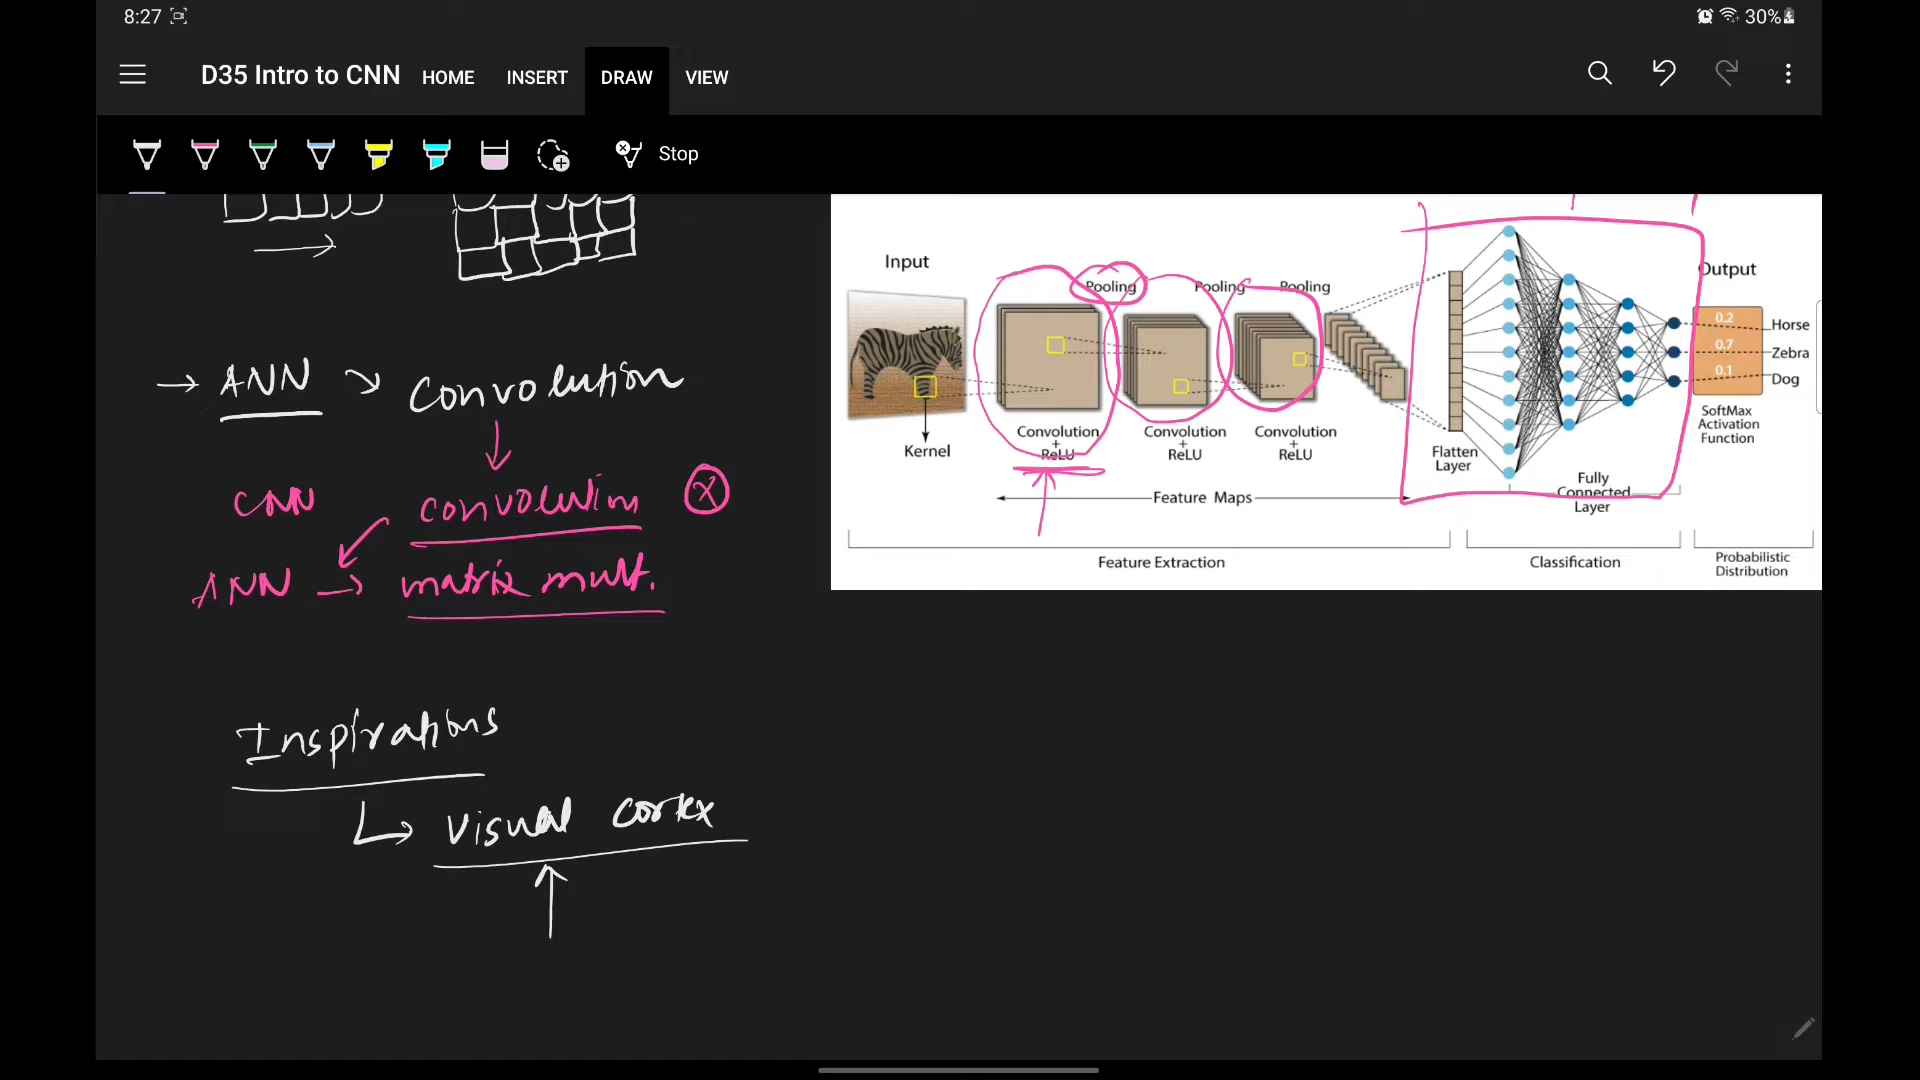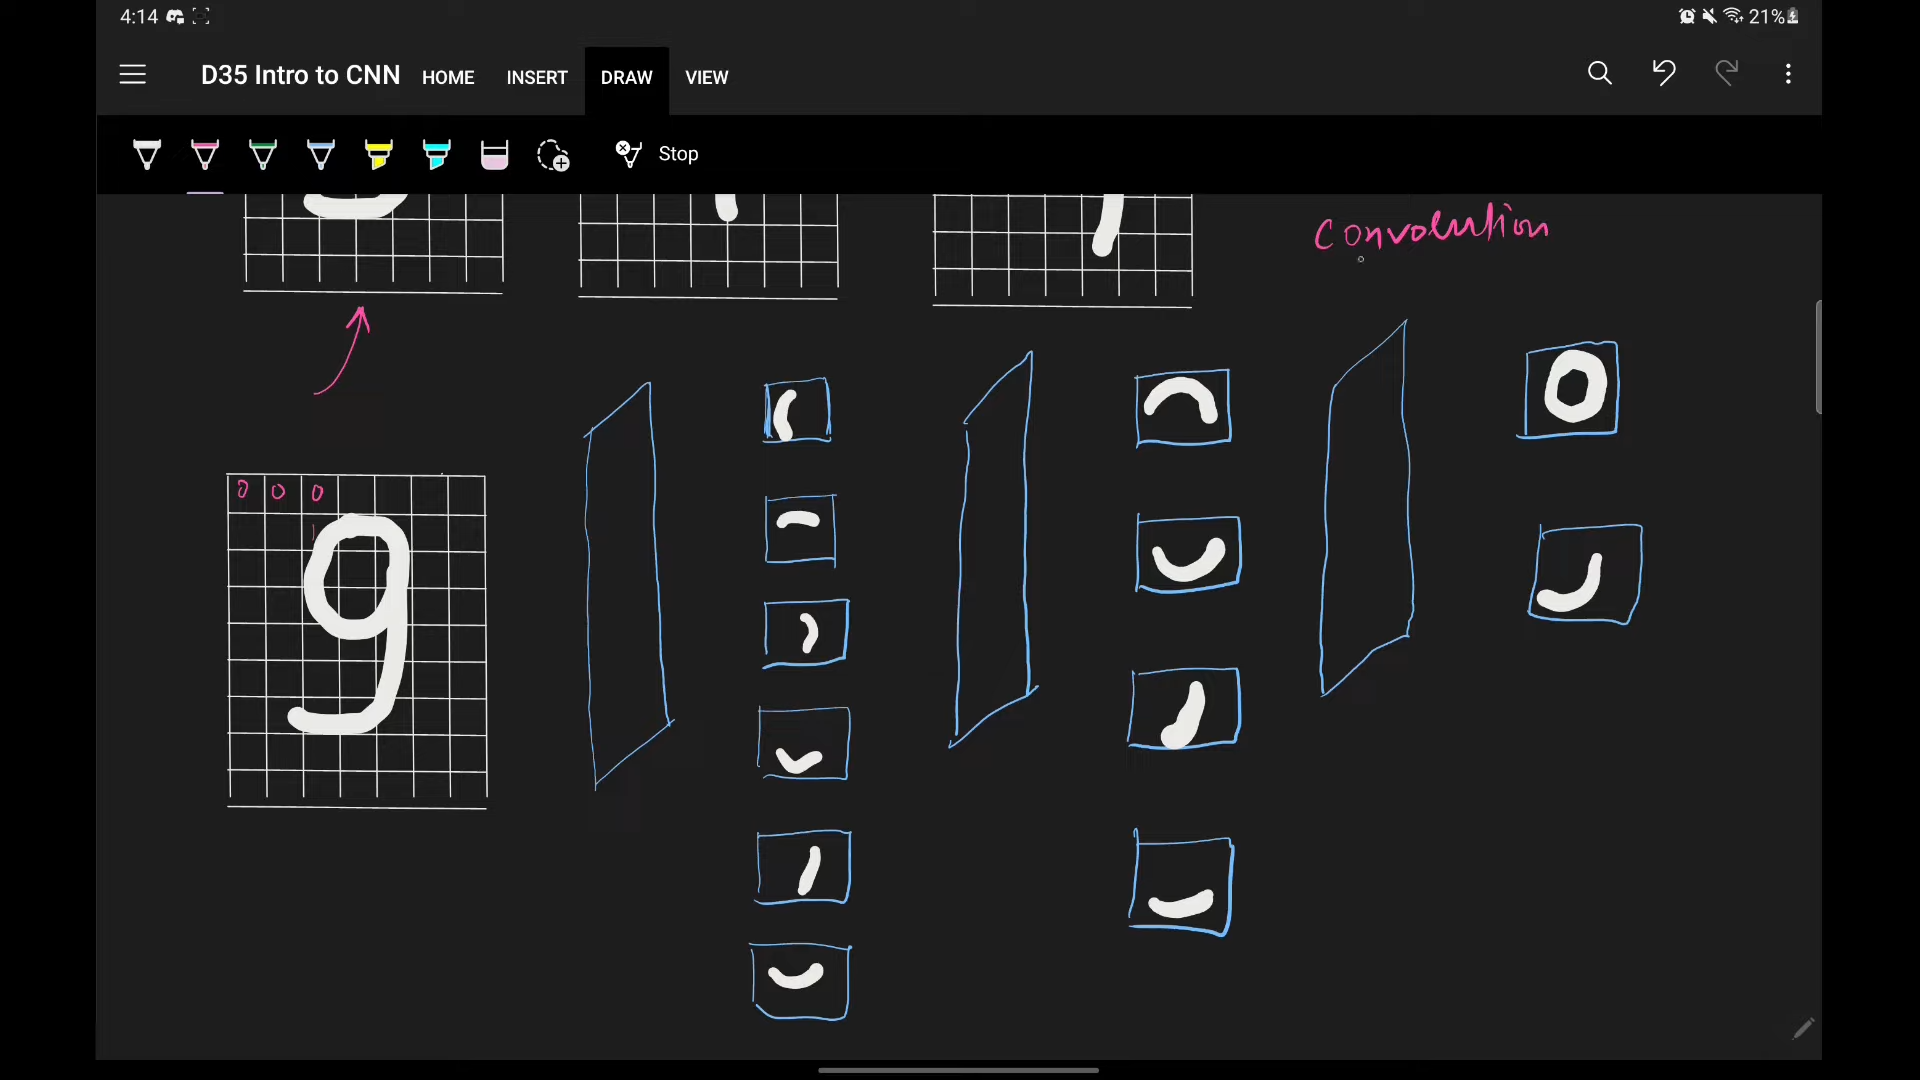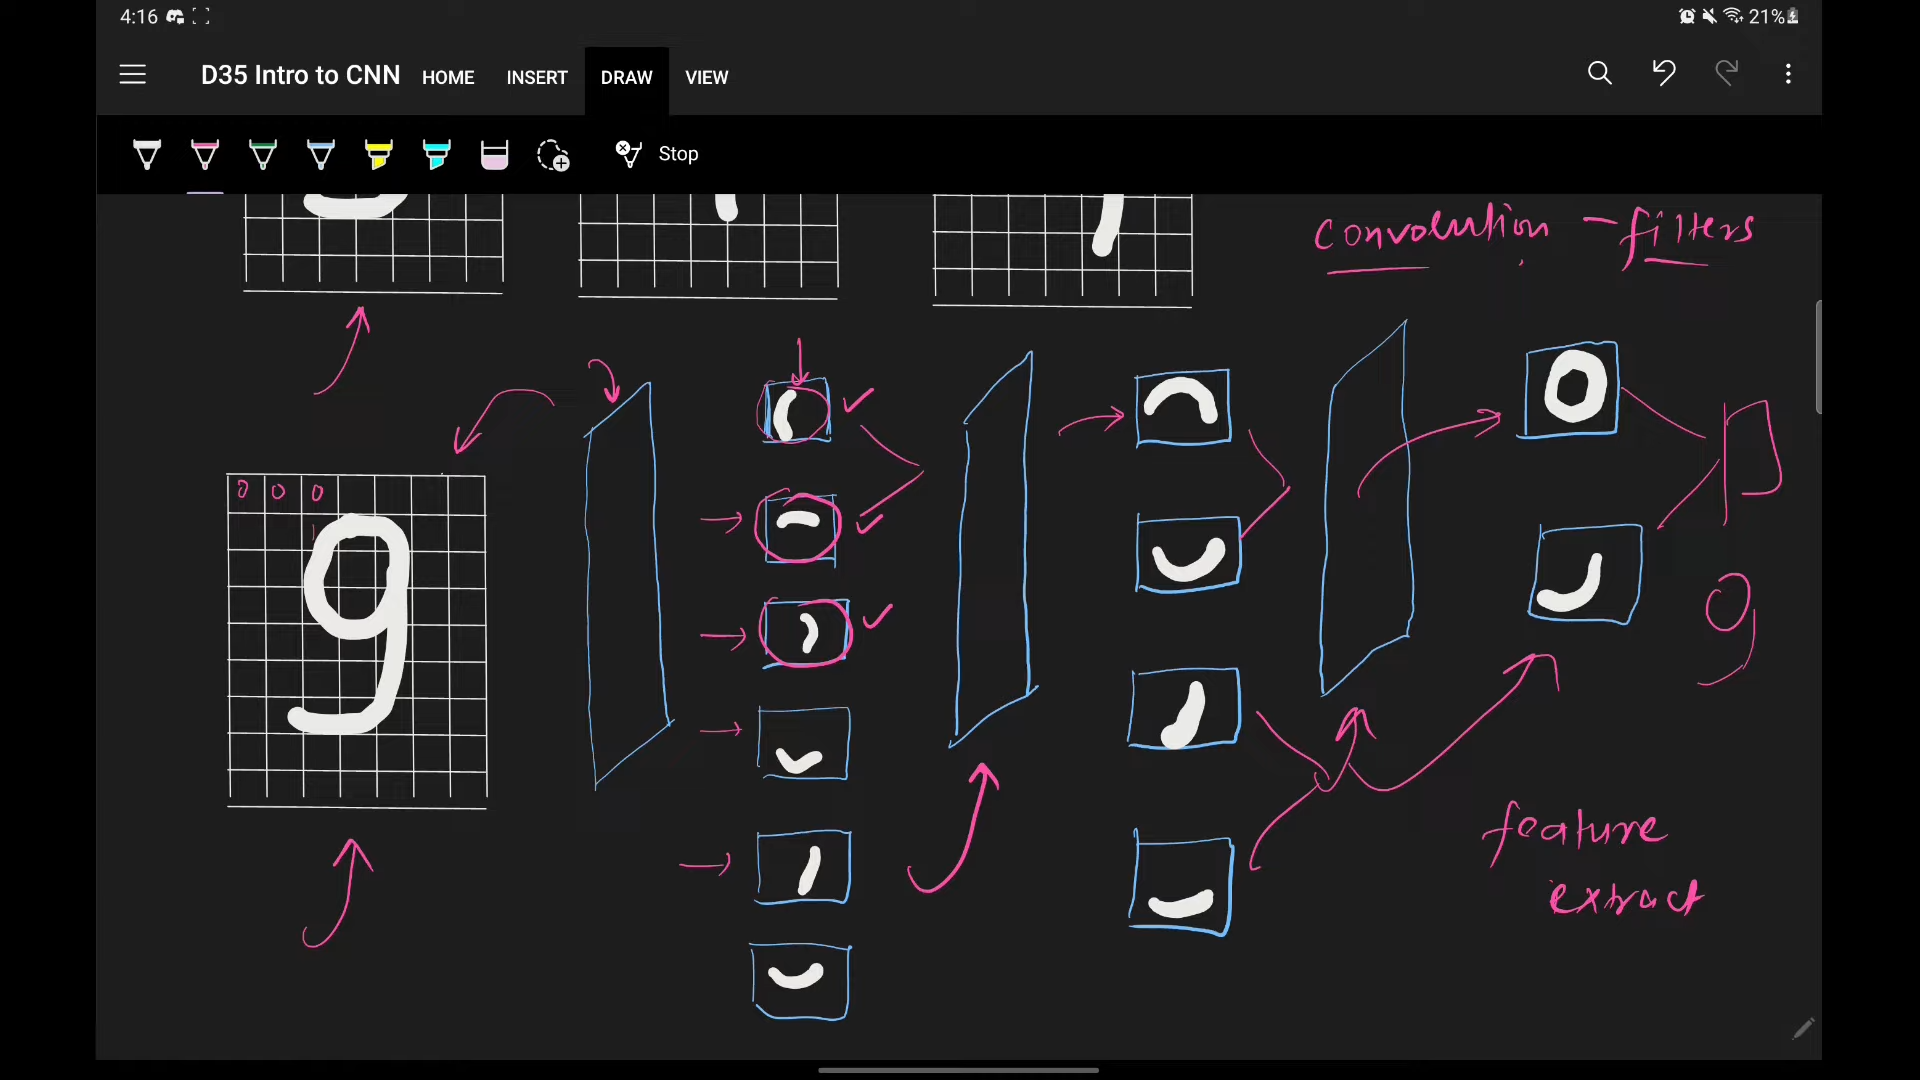

In [ ]:
import tensorflow as tf
#tensorflow already contains mnist dataset which can be loaded using Keras

## Getting Started


In [ ]:
mnist = tf.keras.datasets.mnist
#mnist dataset contains handwritten digits based on a 28*28 sized images of 0 to 9

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# returns a tuple of numpy arrays

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
print(x_train[-1])
#NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38  48
   48  22   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  62  97 198 243 254
  254 212  27   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  67 172 254 25

In [ ]:
import matplotlib.pyplot as plt

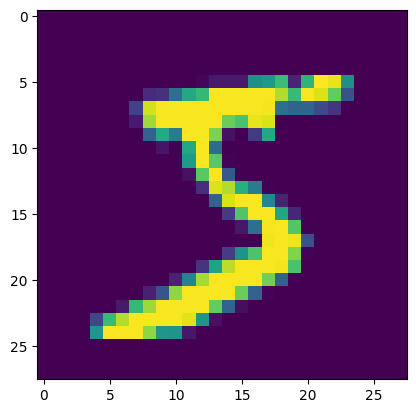

In [ ]:
plt.imshow(x_train[0])
#imshow gives you the image once you feed rgb arrays

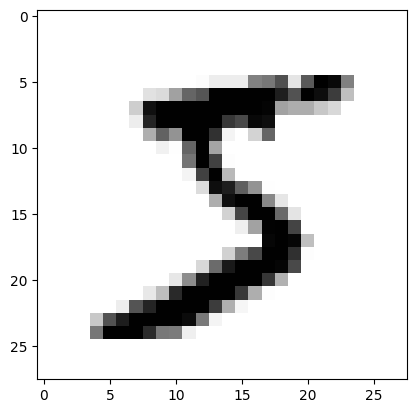

In [ ]:
plt.imshow(x_train[0] , cmap = plt.cm.binary)
#this is hsowing inverted image

In [ ]:
print(y_train[0])

5


In [ ]:
##Checking value of each pixel before normalisation
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

##Normalisation

In [ ]:
# as we have values from 0 to 255 we have to normalise the data we have to divide the values by 255
#there is an in-built function to do this
x_train = tf.keras.utils.normalize(x_train , axis =1)
x_test  = tf.keras.utils.normalize(x_train , axis =1)


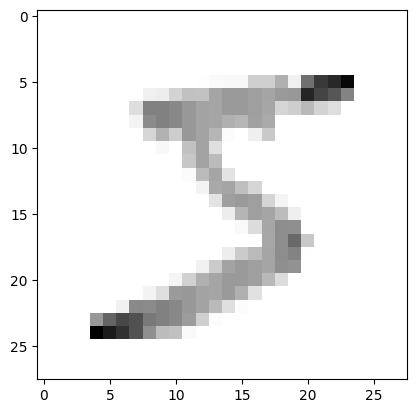

In [ ]:
plt.imshow(x_train[0] , cmap = plt.cm.binary)

In [ ]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## Resizing images to make it suitable for apply Convolution operation


In [ ]:
import numpy as np
IMG_SIZE = 28

x_train_resize = np.array(x_train).reshape(-1, IMG_SIZE , IMG_SIZE , 1)
x_test_resize = np.array(x_test).reshape(-1, IMG_SIZE , IMG_SIZE , 1)
print(x_train_resize.shape)
print(x_test_resize.shape)

(60000, 28, 28, 1)
(60000, 28, 28, 1)


## Creating a Deep Neural Network


In [ ]:
from tensorflow.keras.models import Sequential


In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

####conv2D


The most common type of convolution that is used is the 2D convolution layer and is usually abbreviated as conv2D. A filter or a kernel in a conv2D layer “slides” over the 2D input data, performing an elementwise multiplication. As a result, it will be summing up the results into a single output pixel. The kernel will perform the same operation for every location it slides over, transforming a 2D matrix of features into a different 2D matrix of features.

####Maxpooling


Max pooling is a pooling operation that selects the maximum element from the region of the feature map covered by the filter. Thus, the output after max-pooling layer would be a feature map containing the most prominent features of the previous feature map.
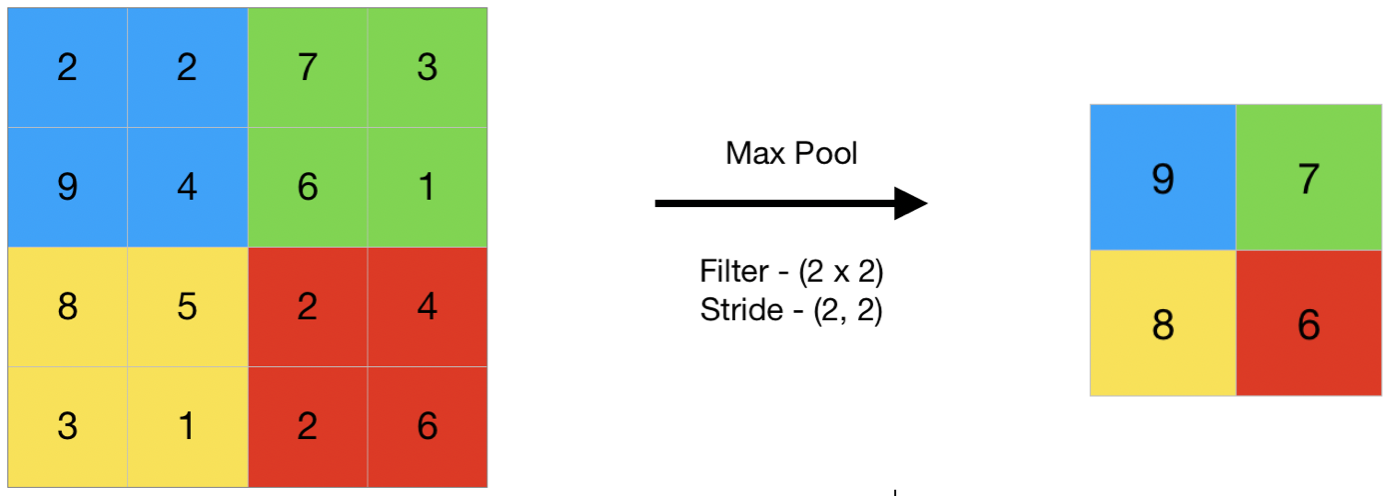

#### Model

In [ ]:
model = Sequential()


##first convolution layer
model.add(Conv2D(64  , (3,3) , input_shape =x_train_resize.shape[1:])) #only for first input size layer
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

##2nd layer
model.add(Conv2D(64  , (3,3) , input_shape =x_train_resize.shape[1:])) #only for first input size layer
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

##3rd layer
model.add(Conv2D(64  , (3,3) , input_shape =x_train_resize.shape[1:])) #only for first input size layer
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

## fully connected layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

##fully connected layer 2
model.add(Dense(32))
model.add(Activation('relu'))

##last fully connected layer
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy" , optimizer = 'adam' , metrics = ['accuracy'])

In [ ]:
# training the model
model.fit(x_train_resize , y_train , epochs = 5 , validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 52s 39ms/step - loss: 0.3660 - accuracy: 0.8836 - val_loss: 0.1316 - val_accuracy: 0.9596
Epoch 2/5
1313/1313 [==============================] - 49s 37ms/step - loss: 0.1176 - accuracy: 0.9644 - val_loss: 0.0920 - val_accuracy: 0.9716
Epoch 3/5
1313/1313 [==============================] - 48s 37ms/step - loss: 0.0812 - accuracy: 0.9751 - val_loss: 0.0838 - val_accuracy: 0.9746
Epoch 4/5
1313/1313 [==============================] - 49s 37ms/step - loss: 0.0644 - accuracy: 0.9804 - val_loss: 0.0758 - val_accuracy: 0.9778
Epoch 5/5
1313/1313 [==============================] - 49s 37ms/step - loss: 0.0511 - accuracy: 0.9844 - val_loss: 0.0715 - val_accuracy: 0.9807


In [ ]:
predictions = model.predict(x_test_resize)

1875/1875 [==============================] - 18s 9ms/step


In [ ]:
print(predictions)

[[8.7577135e-08 2.5033523e-06 8.2463707e-08 ... 2.1597334e-08
  5.8985472e-05 2.5105417e-06]
 [9.9998659e-01 4.5176978e-09 1.1220489e-07 ... 1.2776025e-08
  1.1558707e-05 1.1800082e-06]
 [1.3190017e-12 5.4053104e-09 4.8127274e-10 ... 5.8711258e-09
  9.2464842e-07 5.3097811e-08]
 ...
 [7.7655599e-08 5.3659575e-09 1.0616032e-09 ... 9.7779518e-10
  1.3950010e-04 1.4535613e-04]
 [1.8958667e-04 2.9220812e-06 3.3516160e-05 ... 1.4372592e-09
  2.5323164e-04 1.1138436e-06]
 [1.6006853e-10 1.8230526e-11 2.5709596e-08 ... 1.2355144e-08
  9.9999696e-01 3.0060692e-06]]


In [ ]:
print(np.argmax(predictions[1]))

0


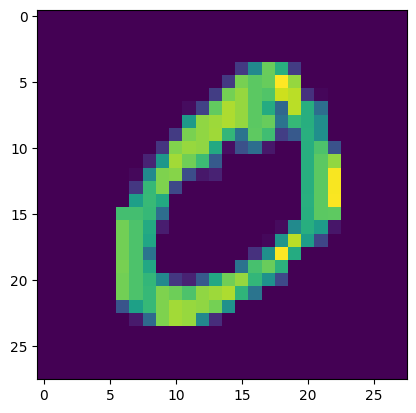

In [ ]:
plt.imshow(x_train[1])

1


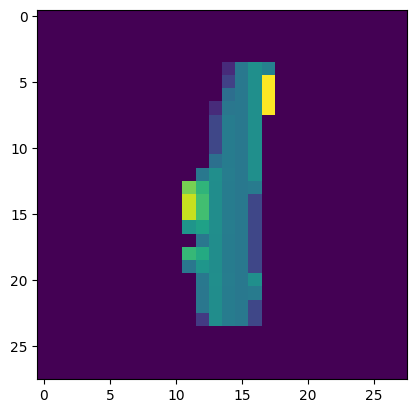

In [ ]:
print(np.argmax(predictions[128]))
plt.imshow(x_train[128])

9


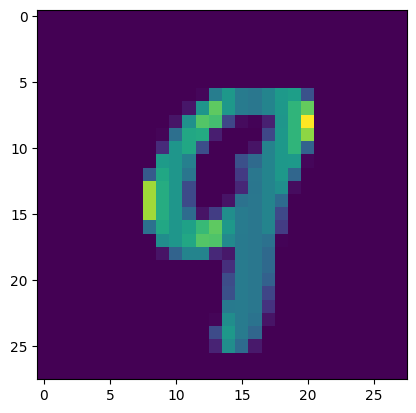

In [ ]:
print(np.argmax(predictions[800]))
plt.imshow(x_train[800])

## Uploading custom image and checking it

In [ ]:
import cv2

In [ ]:
img = cv2.imread('3.png')

TypeError: ignored

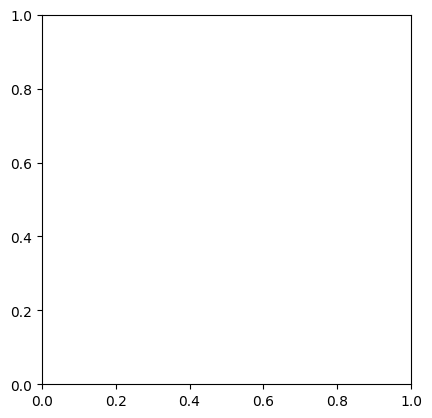

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

In [ ]:
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

In [ ]:
resized = cv2.resize(gray, (28,28) , interpolation = cv2.INTER_AREA)

In [ ]:
plt.imshow(resized)

In [ ]:
resized.shape

In [ ]:
newimg = tf.keras.utils.normalize(resized , axis = 1)

In [ ]:
newimg = np.array(newimg).reshape(-1,IMG_SIZE, IMG_SIZE,1)

In [ ]:
newimg.shape

In [ ]:
predictions = model.predict(newimg)

In [ ]:
print(np.argmax(predictions))

In [ ]:
img = cv2.imread('6.jpg')
plt.imshow(img)
img.shape
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28) , interpolation = cv2.INTER_AREA)
plt.imshow(resized)
newimg = tf.keras.utils.normalize(resized , axis = 1)
newimg = np.array(newimg).reshape(-1,IMG_SIZE, IMG_SIZE,1)
predictions = model.predict(newimg)
print(np.argmax(predictions))

In [ ]:
plt.imshow(img)

## Web Hosting using gradio

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 84.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.0/289.0 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
 

In [ ]:
import gradio as gr
import cv2 as cv2


In [ ]:
def predict_image(img):
  img_3d=img.reshape(-1,28,28,1)
  im_resize=img_3d/255
  prediction=model.predict(im_resize)
  pred=np.argmax(prediction)
  print(prediction)
  return pred

In [ ]:
iface = gr.Interface(predict_image, inputs="sketchpad", outputs="label")



In [ ]:

iface.launch(debug='True')


Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://815a5eace3433c3da4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


KeyboardInterrupt: ignored